# WINE ANALYTICS MP2

### Made by Oliver and Peter:

In [83]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# Setup
DATA_PATH = Path("../data")
redWine = DATA_PATH / "winequality-red.xlsx"
whiteWine = DATA_PATH / "winequality-white.xlsx"

# Dataframes for files - header=1 to skip the first row (Title of file)
df_red_original = pd.read_excel(redWine, header=1)
df_white_original = pd.read_excel(whiteWine, header=1)

## Data Cleaning

In [4]:
# Shape of files
print(df_red_original.shape)
print(df_white_original.shape)

(1599, 12)
(4898, 12)


### Add wine type column to dataframe

In [5]:
# Assigning original df's to workable ones
df_red = df_red_original.copy()
df_white = df_white_original.copy()

In [6]:
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'


In [7]:
# Ensure new columns has been added
df_red.shape

(1599, 13)

### Finding NA data (if any) and removing duplicate data before anylysis 

In [8]:
print(df_red.isna().sum())
print(df_white.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


Since no NA data exists, we move on to dropping duplicate data from the dataframes:

In [9]:
# Finding sum of duplicates
print(df_red.duplicated().sum())
print(df_white.duplicated().sum())


240
937


In [10]:
# Dropping duplicates from df's and assigning them to new ones
df_red_clean = df_red.drop_duplicates()
df_white_clean = df_white.drop_duplicates()

# Sum of duplicates after cleaning (should be 0)
print("Sum of red duplicates: " + str(df_red_clean.duplicated().sum()) + "\nNew df_red shape: " + str(df_red_clean.shape))
print("\nSum of white duplicates: "  + str(df_white_clean.duplicated().sum()) + "\nNew df_white shape: " + str(df_white_clean.shape))

Sum of red duplicates: 0
New df_red shape: (1359, 13)

Sum of white duplicates: 0
New df_white shape: (3961, 13)


### Combining the two dataframes into one for processing

In [11]:
df_combined = pd.concat([df_red_clean, df_white_clean], ignore_index=True)

df_combined.shape

(5320, 13)

In [12]:
# Making use both white and red (wine_type) exists in the df
df_combined.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1666,6.4,0.240,0.32,14.90,0.047,54.0,162.0,0.99680,3.28,0.50,10.2,6,white
3574,7.6,0.100,0.33,1.00,0.031,33.0,93.0,0.99094,3.06,0.68,11.2,6,white
519,8.5,0.585,0.18,2.10,0.078,5.0,30.0,0.99670,3.20,0.48,9.8,6,red
3742,5.2,0.285,0.29,5.15,0.035,64.0,138.0,0.98950,3.19,0.34,12.4,8,white
4093,6.5,0.220,0.28,3.70,0.059,29.0,151.0,0.99177,3.23,0.41,12.1,7,white
3052,6.4,0.260,0.40,1.70,0.179,5.0,60.0,0.99250,3.09,0.54,10.1,5,white
3137,7.2,0.160,0.26,7.10,0.054,41.0,224.0,0.99660,3.38,0.55,10.1,5,white
3805,7.3,0.260,0.24,1.70,0.050,10.0,112.0,0.99286,3.11,0.43,9.9,5,white
4800,6.9,0.520,0.54,7.90,0.036,23.0,169.0,0.99267,3.26,0.47,12.2,6,white
738,11.7,0.280,0.47,1.70,0.054,17.0,32.0,0.99686,3.15,0.67,10.6,7,red


## Data Exploring 

### Exploring the features of the three df's separately

In [13]:
# Red wine
df_red_original.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1036,7.6,0.31,0.34,2.5,0.082,26.0,35.0,0.99356,3.22,0.59,12.5,7


In [14]:
# White wine
df_white_original.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1842,8.2,0.18,0.31,11.8,0.039,96.0,249.0,0.9976,3.07,0.52,9.5,6


In [15]:
df_combined.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
768,7.2,0.63,0.03,2.2,0.08,17.0,88.0,0.99745,3.53,0.58,9.8,6,red


The original dataframes for the red and white wine have a single dependent variable 'quality', where the others are independent (at least from the initial assumption). 
The combined dataframe potentially has two dependent variables after we've added the 'wine_type' variable.

## Exploring features

In [16]:
df_red_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
df_white_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [18]:
df_combined.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Transforming categorical data (wine_type)

In [19]:
df_combined['wine_type'] = df_combined['wine_type'].astype('category').cat.codes

In [20]:
df_combined.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
2574,8.5,0.56,0.74,17.85,0.051,51.0,243.0,1.00050,2.99,0.70,9.2,5,1
4821,7.0,0.20,0.35,8.80,0.037,31.0,103.0,0.99388,3.13,0.49,11.0,6,1
327,7.4,0.55,0.22,2.20,0.106,12.0,72.0,0.99590,3.05,0.63,9.2,5,0
3195,7.4,0.24,0.26,1.60,0.058,53.0,150.0,0.99360,3.18,0.50,9.9,7,1
4112,6.8,0.20,0.28,12.60,0.048,54.0,136.0,0.99556,3.19,0.37,10.7,6,1


In [21]:
categorical_data = df_combined.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], axis=1)

In [22]:
wine_type_count = categorical_data['wine_type'].value_counts()

In [23]:
wine_type_count

wine_type
1    3961
0    1359
Name: count, dtype: int64

## Visualization
### Made by Peter:

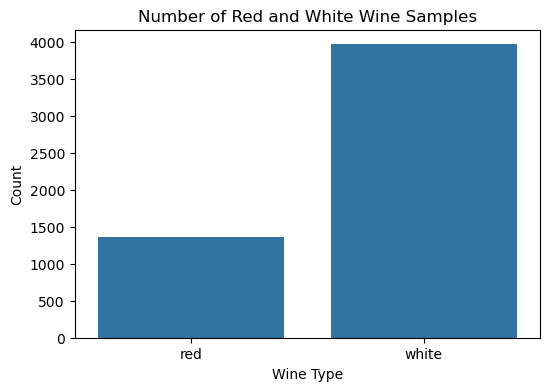

In [24]:
# Visualizing the number of samples of red and white wine
plt.figure(figsize=(6,4))
sb.countplot(x='wine_type', data=df_combined.replace({'wine_type': {0: 'red', 1: 'white'}}))
plt.title('Number of Red and White Wine Samples')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()


- White wine has a much greater sample size which could potentially affect future analysis if forgetting to use the wine_type

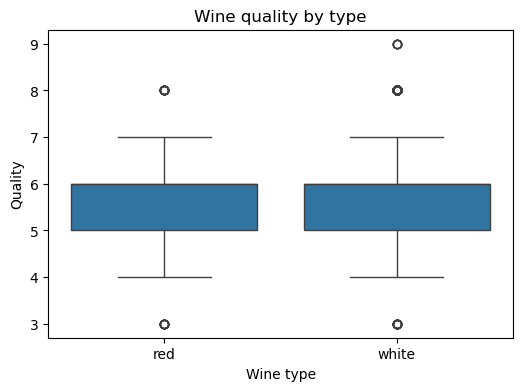

In [27]:
# Comparing the distribution and average of quality scores for red and white wines using boxplot
plt.figure(figsize=(6,4))
sb.boxplot(x='wine_type', y='quality', data=df_combined.replace({'wine_type': {0: 'red', 1: 'white'}}))
plt.title('Wine quality by type')
plt.xlabel('Wine type')
plt.ylabel('Quality')
plt.show()


- Both red and white wine lies between a quality score of 4 - 7, with the majority being between 5-6, visualizing a similar average quality between them. They both have outliers at each end of the spectrum, although white wine has the greatest outlier at a quality score of 9

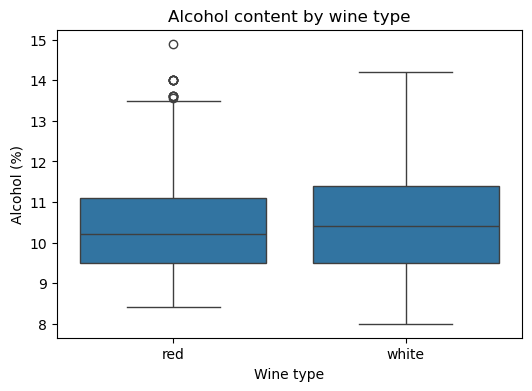

In [29]:
# Comparing alcohol content between red and white wines
plt.figure(figsize=(6,4))
sb.boxplot(x='wine_type', y='alcohol', data=df_combined.replace({'wine_type': {0: 'red', 1: 'white'}}))
plt.title('Alcohol content by wine type')
plt.xlabel('Wine type')
plt.ylabel('Alcohol (%)')
plt.show()

- White wine has a slightly higher average alcohol content, with red wine having the most outliers.

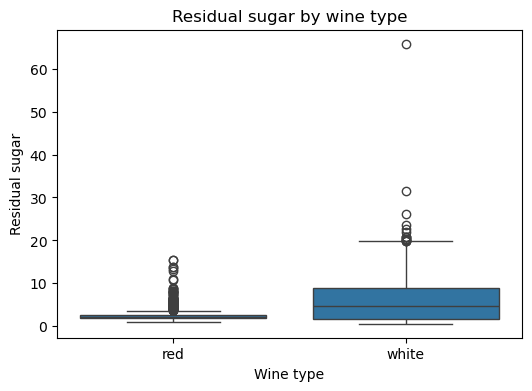

In [31]:
# Comparing residual sugar between red and white wines.
plt.figure(figsize=(6,4))
sb.boxplot(x='wine_type', y='residual sugar', data=df_combined.replace({'wine_type': {0: 'red', 1: 'white'}}))
plt.title('Residual sugar by wine type')
plt.xlabel('Wine type')
plt.ylabel('Residual sugar')
plt.show()

- Considering the high quantity (and large values) of outliers, it's hard to visualize much from the boxplot, other than white whine has the larger average of residual sugar. Removing the outlier may give a better visualization:

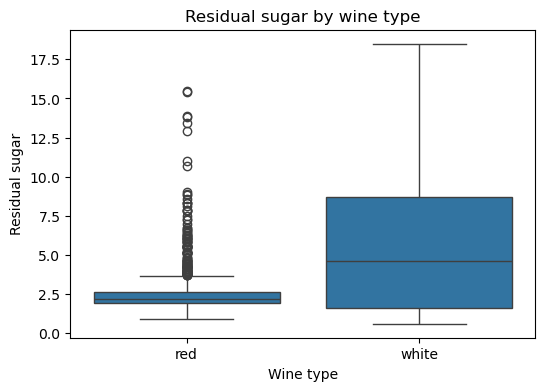

In [41]:
# Dealing with outliers using the std
factor = 3
upper_lim = df_combined['residual sugar'].mean () + df_combined['residual sugar'].std () * factor
lower_lim = df_combined['residual sugar'].mean () - df_combined['residual sugar'].std () * factor

no_outliers = df_combined[(df_combined['residual sugar'] < upper_lim) & (df_combined['residual sugar'] > lower_lim)]

plt.figure(figsize=(6,4))
sb.boxplot(x='wine_type', y='residual sugar', data=no_outliers.replace({'wine_type': {0: 'red', 1: 'white'}}))
plt.title('Residual sugar by wine type')
plt.xlabel('Wine type')
plt.ylabel('Residual sugar')
plt.show()

- The factor determines how far (or how many standard deviations) from the mean the values can get before they get removed. I'm using a value of 3 as using anything lower would remove values that are not outliers for the white wine sample. 
- It is now clearer to see that the white wine has a higher average residual sugar compared to the red wine.

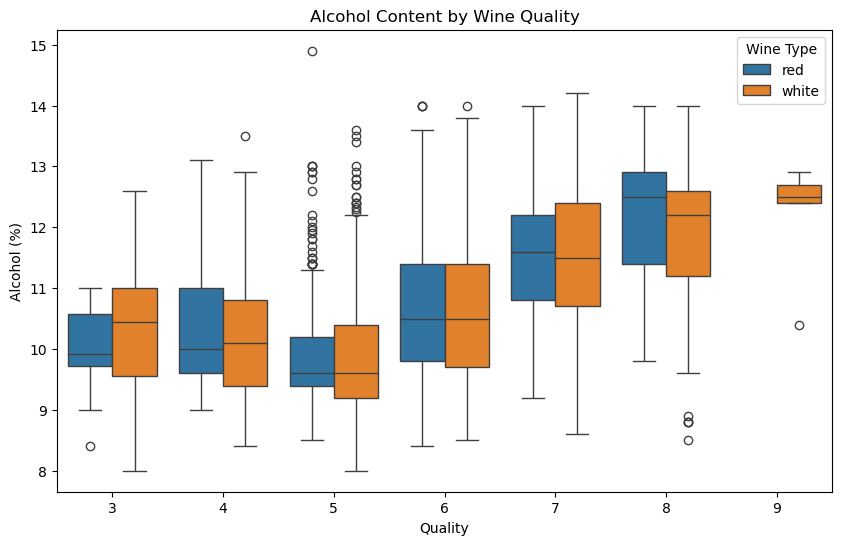

In [44]:
# Visualizing if the alcohol content influences wine quality
plt.figure(figsize=(10,6))
sb.boxplot(x='quality', y='alcohol', data=df_combined, hue=df_combined['wine_type'].replace({0: 'red', 1: 'white'}))
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol (%)')
plt.legend(title='Wine Type')
plt.show()

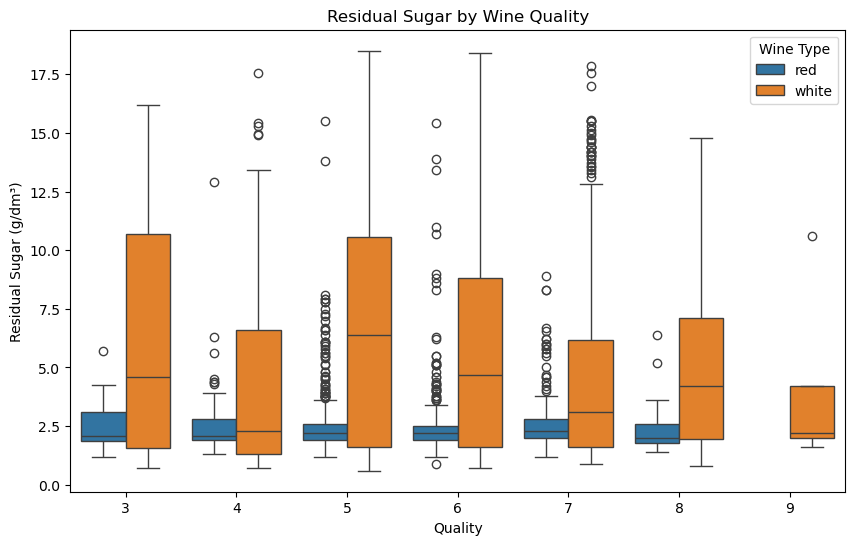

In [46]:
# Visualizing if residual sugar influences wine quality
plt.figure(figsize=(10,6))
sb.boxplot(x='quality', y='residual sugar', data=no_outliers, hue=no_outliers['wine_type'].replace({0: 'red', 1: 'white'}))
plt.title('Residual Sugar by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar (g/dm³)')
plt.legend(title='Wine Type')
plt.show()


In [51]:
# Binning pH into 5 equal-width bins
df_combined['pH_bin_5'] = pd.cut(df_combined['pH'], bins=5)

# Checking the number of samples in each bin 
print(df_combined['pH_bin_5'].value_counts().sort_index())



pH_bin_5
(2.719, 2.978]     253
(2.978, 3.236]    2687
(3.236, 3.494]    2089
(3.494, 3.752]     275
(3.752, 4.01]       16
Name: count, dtype: int64


- From the 5 bins we can see that most wines have a pH between 2.978 and 3.494. Very few wines have extremely low or high pH.

In [54]:
# Grouping by the pH bins and calculate mean density
mean_density_5 = df_combined.groupby('pH_bin_5')['density'].mean()
print(mean_density_5)

# Finding the bin with the highest mean density
max_density_bin_5 = mean_density_5.idxmax()
print(f"Bin with highest mean density: {max_density_bin_5}")


pH_bin_5
(2.719, 2.978]    0.994323
(2.978, 3.236]    0.994500
(3.236, 3.494]    0.994579
(3.494, 3.752]    0.994799
(3.752, 4.01]     0.993582
Name: density, dtype: float64
Bin with highest mean density: (3.494, 3.752]


/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_17504/3099255564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_density_5 = df_combined.groupby('pH_bin_5')['density'].mean()


- The highest mean density is in the bin (3.494, 3.752] with a mean density of 0.994799. On average wines with a pH between 3.494 and 3.752 have the highest density among the five bins.

In [56]:
# Binning pH into 10 equal-width bins
df_combined['pH_bin_10'] = pd.cut(df_combined['pH'], bins=10)

# Grouping by the pH bins and calculating mean density
mean_density_10 = df_combined.groupby('pH_bin_10')['density'].mean()
print(mean_density_10)

# Finding the bin with the highest mean density
max_density_bin_10 = mean_density_10.idxmax()
print(f"Bin with highest mean density: {max_density_bin_10}")


pH_bin_10
(2.719, 2.849]    0.993128
(2.849, 2.978]    0.994393
(2.978, 3.107]    0.994496
(3.107, 3.236]    0.994502
(3.236, 3.365]    0.994373
(3.365, 3.494]    0.995001
(3.494, 3.623]    0.994865
(3.623, 3.752]    0.994475
(3.752, 3.881]    0.993888
(3.881, 4.01]     0.992665
Name: density, dtype: float64
Bin with highest mean density: (3.365, 3.494]


/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_17504/2315849446.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_density_10 = df_combined.groupby('pH_bin_10')['density'].mean()


- When splitting into 10 bins, the highest mean density is found in the pH range 3.365 to 3.494

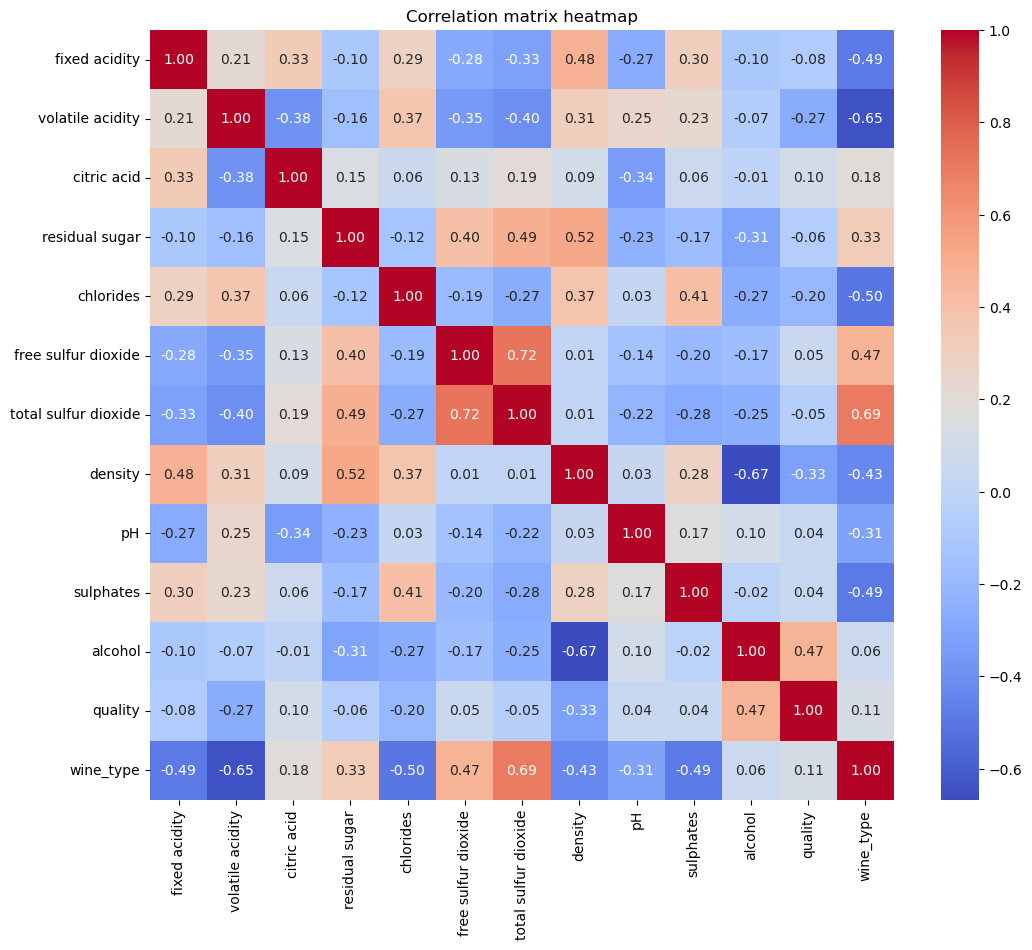

In [64]:
# Dropping the bin columns and computing the correlation matrix for all numeric columns
df_corr = df_combined.drop(columns=['pH_bin_5', 'pH_bin_10'], errors='ignore')
corr_matrix = df_corr.corr()


plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix heatmap')
plt.show()


### Interpretaiton of the heatmap

#### Attribute with the biggest influence on wine quality
- Alcohol has the strongest positive correlation with wine quality (0.47), indicating that wines with higher alcohol content tend to have higher quality ratings
- Density has the strongest negative correlation with quality (-0.33), suggesting that denser wines tend to have lower quality

#### Attribute with the lowest infulence on wine quality
- Free sulfur dioxide and pH have the lowest correlation with wine quality (both at 0.04), indicating almost no linear relationship with quality.

#### Correlated attributes
- Free sulfur dioxide and total sulfur dioxide are highly positively correlated (0.72), which is expected since total sulfur dioxide includes free sulfur dioxide.
- Residual sugar and density also show a strong positive correlation (0.52).
- Wine type is strongly correlated with several attributes, such as total sulfur dioxide (0.69) and volatile acidity (-0.65), reflecting the chemical differences between red and white wines.


## Preparing data for further analysis

In [ ]:
# Finding number of outliers in residual sugar
outliers = df_combined[(df_combined['residual sugar'] < lower_lim) | 
                       (df_combined['residual sugar'] > upper_lim)]

print("Outlier rows:")
print("Number of rows: " + str(len(outliers)))
print(outliers.index.tolist())

Outlier rows (indices):
Number of rows: 42
[1359, 1369, 1447, 1452, 1514, 1579, 1605, 1703, 1728, 1963, 2001, 2002, 2239, 2588, 2612, 2715, 2753, 2815, 2860, 3161, 3365, 3372, 3429, 3499, 3526, 3653, 3656, 3836, 4032, 4159, 4178, 4219, 4259, 4260, 4314, 4361, 4399, 4671, 4939, 4959, 5143, 5213]


- As we saw previously, residual sugar definitely contain outliers, which is found to be 42 above.

In [ ]:
# Removing attributes not directly correlated with wine quality as found by the correlation matrix and heatmap previously
# As well as highly correlated independent variables
# Dropping quality and wine type as they can't be normalized 
columns_to_drop = [
    'free sulfur dioxide',
    'total sulfur dioxide',  
    'pH',                   
    'chlorides',
    'quality',
    'wine_type'          
]

df_selected = no_outliers.drop(columns=columns_to_drop)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
df_selected = sc.fit_transform(df_selected)  
df_selected

array([[ 0.13871951,  2.1105186 , -2.17130979, ...,  1.15625781,
         0.17422201, -0.97636921],
       [ 0.44103139,  3.17884751, -2.17130979, ...,  0.80747704,
         0.97388325, -0.63839476],
       [ 0.44103139,  2.46662823, -1.89799137, ...,  0.87723319,
         0.77396794, -0.63839476],
       ...,
       [-0.54148222, -0.61965528, -0.87304729, ..., -0.67832903,
        -0.49216235, -0.97636921],
       [-1.29726191, -0.32289725, -0.12142163, ..., -2.02113499,
        -1.02526984,  1.89641362],
       [-0.91937206, -0.7977101 ,  0.42521521, ..., -1.77001284,
        -1.42510046,  1.05147749]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(df_selected)
pca_data

array([[ 1.31255389, -2.02479545, -2.39509959, ..., -0.41533036,
        -0.16036754,  0.24168862],
       [ 1.55068453, -3.02648909, -2.33234809, ...,  0.27749087,
         0.27130395, -0.34958662],
       [ 1.39668085, -2.50594334, -1.93666335, ...,  0.01488344,
         0.0361406 , -0.11228668],
       ...,
       [-0.81464603,  0.11169409, -0.77542024, ..., -1.54363341,
        -0.38716512, -0.23993568],
       [-3.30529091, -0.17364779,  0.12117296, ...,  0.37851241,
         0.35384546,  0.17347204],
       [-2.76239482,  0.50067163,  0.48395509, ..., -0.36088912,
         0.35064659,  0.10835234]])

In [89]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.32309748, 0.23013874, 0.19723748, 0.099987  , 0.08659181,
       0.05253426, 0.01041324])

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_17504/1047061413.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


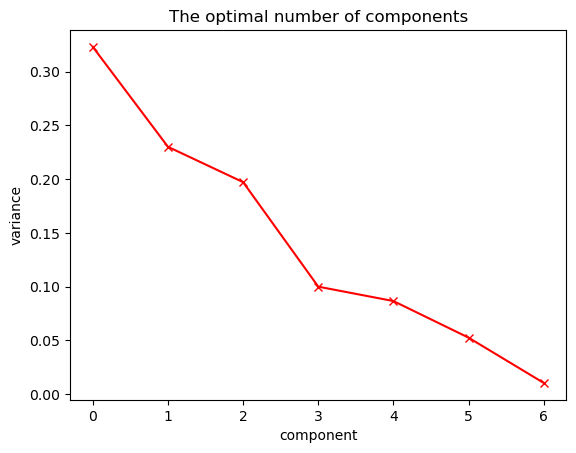

In [ ]:
# Plotting the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

/var/folders/bx/f_dht_453s50ypf31yg3cngr0000gn/T/ipykernel_17504/941642281.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


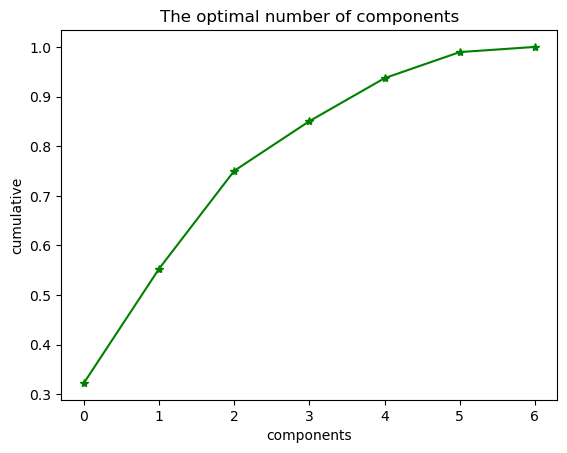

In [91]:
# Plotting the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

- If we want to represent ~90% variance we should use 5 components. However, the last elbow occurs at component 4, which I'd assume means using 4 components should be valid as well, still covering ~85%

In [92]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df_selected)
pca_data

array([[ 1.31255389, -2.02479545, -2.39509959, -0.45069355],
       [ 1.55068453, -3.02648909, -2.33234809, -0.21512764],
       [ 1.39668085, -2.50594334, -1.93666335, -0.21426648],
       ...,
       [-0.81464603,  0.11169409, -0.77542024, -0.03861038],
       [-3.30529091, -0.17364779,  0.12117296, -0.28705183],
       [-2.76239482,  0.50067163,  0.48395509, -0.70767179]])

In [95]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pcadf.sample(10)

,pc 1,pc 2,pc 3,pc 4
4595,-1.172749,0.628529,-0.717908,-0.035855
2545,2.652391,0.300849,-0.262607,0.088546
5232,-1.016601,-0.504401,0.450874,0.075992
1159,1.757762,-2.717408,0.512357,3.189267
4039,0.163766,0.675264,0.518435,-1.288732
1535,-1.273580,-0.064299,1.015919,0.544681
877,-0.106302,-1.940825,-1.548962,-0.080590
4370,1.390579,2.663744,-1.056647,0.046803
2411,0.007727,1.754141,-0.475376,-0.302546
125,0.988599,-1.219251,-1.027558,-0.567737


- After standardizing the data and removing outliers and redundant attributes, and applying PCA, the first four principal components capture approximately 85–90% of the variance in the original dataset. Each wine sample is now represented by four new dimensions (PC1–PC4).


## Creating and deploying interactive application

A small attempt at an app can be found in /app/wineapp-peter.py - as streamlit is not currently well understood, this attempt is heavily supported by AI and is not very representative